In [1]:
import pandas as pd 
data=pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


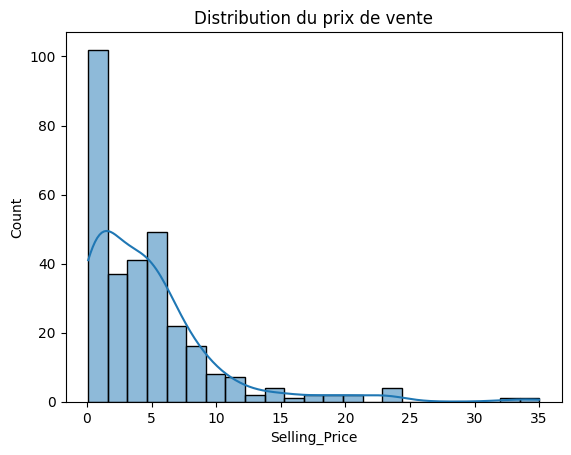

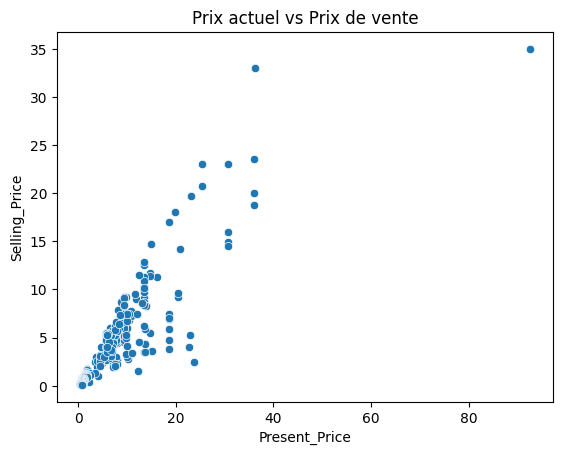

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de la variable cible
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Distribution du prix de vente')
plt.show()

# Relation entre le prix de vente et le prix présent
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Prix actuel vs Prix de vente')
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encodage de la colonne Fuel_Type
data['Fuel_Type'] = LabelEncoder().fit_transform(data['Fuel_Type'])

# Encodage de Selling_type et Transmission
data['Selling_type'] = LabelEncoder().fit_transform(data['Selling_type'])
data['Transmission'] = LabelEncoder().fit_transform(data['Transmission'])


In [5]:
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          2   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          2   
3    wagon r  2011           2.85           4.15        5200          2   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          2   
298     city  2009           3.35          11.00       87934          2   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0               0             1      0  
1               0

In [6]:
# Encodage One-Hot pour la colonne Car_Name
data = pd.get_dummies(data, columns=['Car_Name'], drop_first=True)


In [7]:
print(data)


     Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0    2014           3.35           5.59       27000          2             0   
1    2013           4.75           9.54       43000          1             0   
2    2017           7.25           9.85        6900          2             0   
3    2011           2.85           4.15        5200          2             0   
4    2014           4.60           6.87       42450          1             0   
..    ...            ...            ...         ...        ...           ...   
296  2016           9.50          11.60       33988          1             0   
297  2015           4.00           5.90       60000          2             0   
298  2009           3.35          11.00       87934          2             0   
299  2017          11.50          12.50        9000          1             0   
300  2016           5.30           5.90        5464          2             0   

     Transmission  Owner  Car_Name_Acti

In [8]:

# Exemple d'affichage de tous les noms de colonnes
print("Noms des colonnes dans le DataFrame :")
print(data.columns.tolist())

Noms des colonnes dans le DataFrame :
['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street', 'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi', 'Car_Name_Bajaj Avenger Street 220', 'Car_Name_Bajaj Discover 100', 'Car_Name_Bajaj Discover 125', 'Car_Name_Bajaj Dominar 400', 'Car_Name_Bajaj Pulsar  NS 200', 'Car_Name_Bajaj Pulsar 135 LS', 'Car_Name_Bajaj Pulsar 150', 'Car_Name_Bajaj Pulsar 220 F', 'Car_Name_Bajaj Pulsar NS 200', 'Car_Name_Bajaj Pulsar RS200', 'Car_Name_Hero  CBZ Xtreme', 'Car_Name_Hero  Ignitor Disc', 'Car_Name_Hero Extreme', 'Car_Name_Hero Glamour', 'Car_Name_Hero Honda CBZ extreme', 'Car_Name_Hero Honda Passion Pro', 'Car_Name_Hero Hunk', 'Car_Name_Hero Passion Pro', 'Car_Name_Hero Passion X pro', 'Car_Name_Hero Splender Plus', 'Car_Name_Hero Splender iSmart', 'Car_N

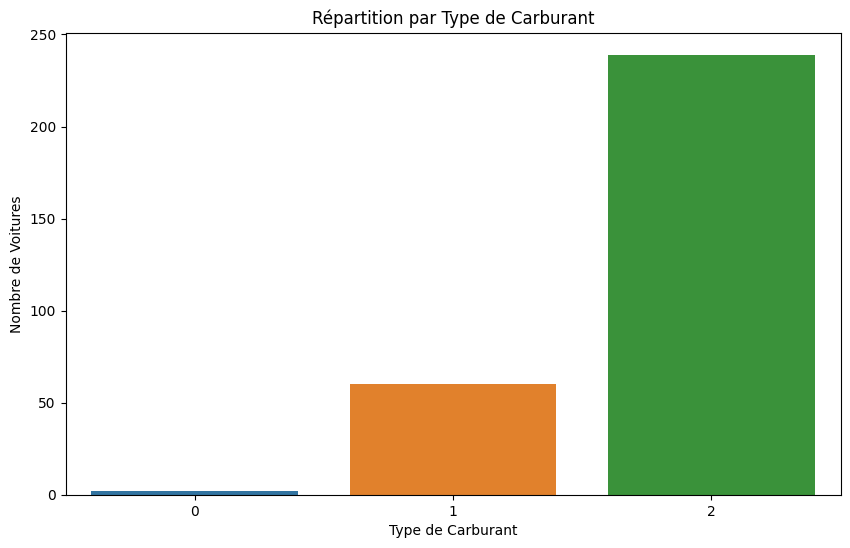

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=data)
plt.title('Répartition par Type de Carburant')
plt.xlabel('Type de Carburant')
plt.ylabel('Nombre de Voitures')
plt.show()


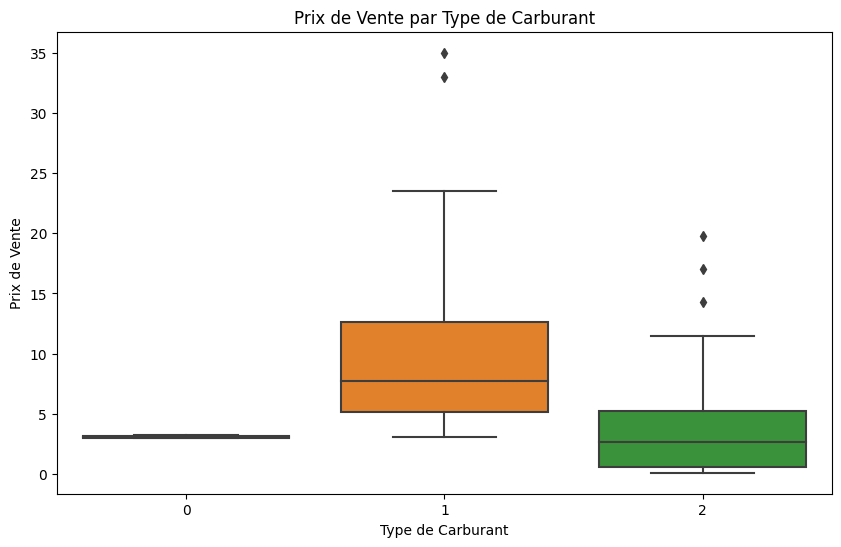

In [10]:
#visualisation des prix de vente par type de carburant
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Prix de Vente par Type de Carburant')
plt.xlabel('Type de Carburant')
plt.ylabel('Prix de Vente')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques et la cible
X = data.drop('Selling_Price', axis=1)  
y = data['Selling_Price']  

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Créer et entraîner le modèle Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_reg.predict(X_test)

# Évaluer le modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 0.8063425678688525, R²: 0.9649957843631618


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


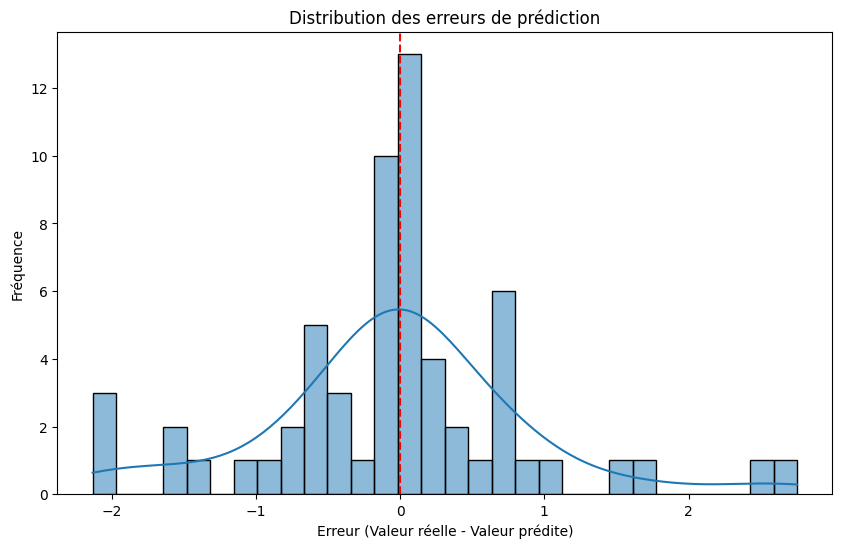

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prédictions avec le modèle
rf_reg.fit(X_train, y_train)  # Entraîner le modèle
y_pred = rf_reg.predict(X_test)  # Prédire sur le jeu de test

# Calculer les erreurs
errors = y_test - y_pred

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution des erreurs de prédiction')
plt.xlabel('Erreur (Valeur réelle - Valeur prédite)')
plt.ylabel('Fréquence')
plt.axvline(0, color='red', linestyle='--')
plt.show()


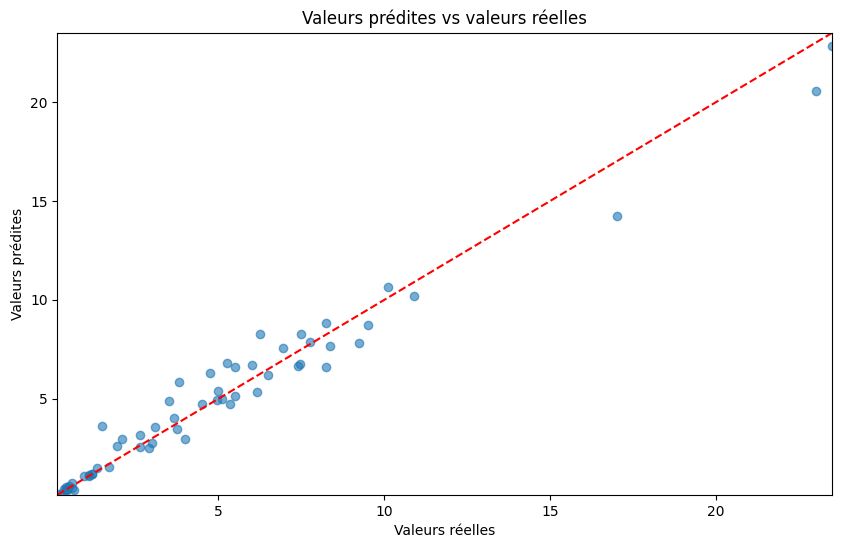

In [14]:
# Graphique des valeurs prédites vs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne de référence
plt.title('Valeurs prédites vs valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))
plt.show()


In [15]:
from xgboost import XGBRegressor

# Créer et entraîner le modèle XGBoost
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_reg.predict(X_test)

# Évaluer le modèle
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Gradient Boosting (XGBoost) - MSE: {mse_xgb}, R²: {r2_xgb}")


Gradient Boosting (XGBoost) - MSE: 0.8962707132367227, R²: 0.9610919048983859


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


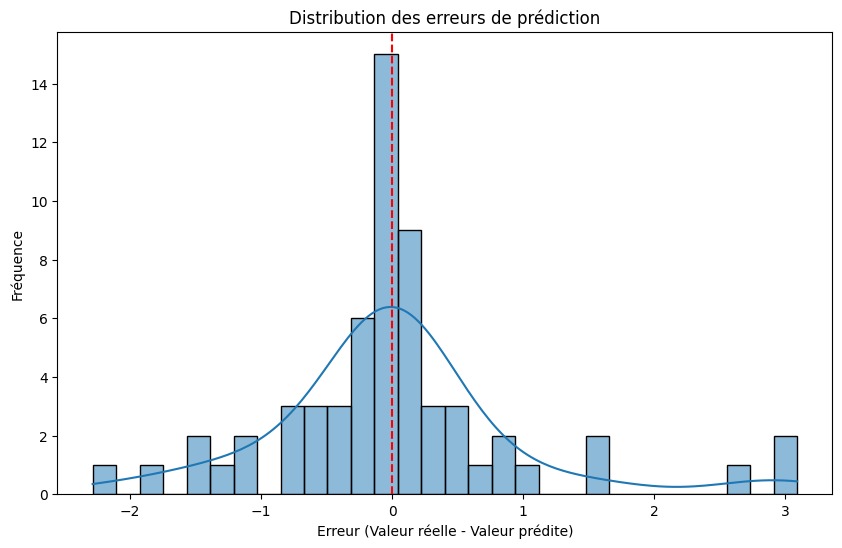

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prédictions avec le modèle
xgb_reg.fit(X_train, y_train)  # Entraîner le modèle
y_pred = xgb_reg.predict(X_test)  # Prédire sur le jeu de test

# Calculer les erreurs
errors = y_test - y_pred

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution des erreurs de prédiction')
plt.xlabel('Erreur (Valeur réelle - Valeur prédite)')
plt.ylabel('Fréquence')
plt.axvline(0, color='red', linestyle='--')
plt.show()


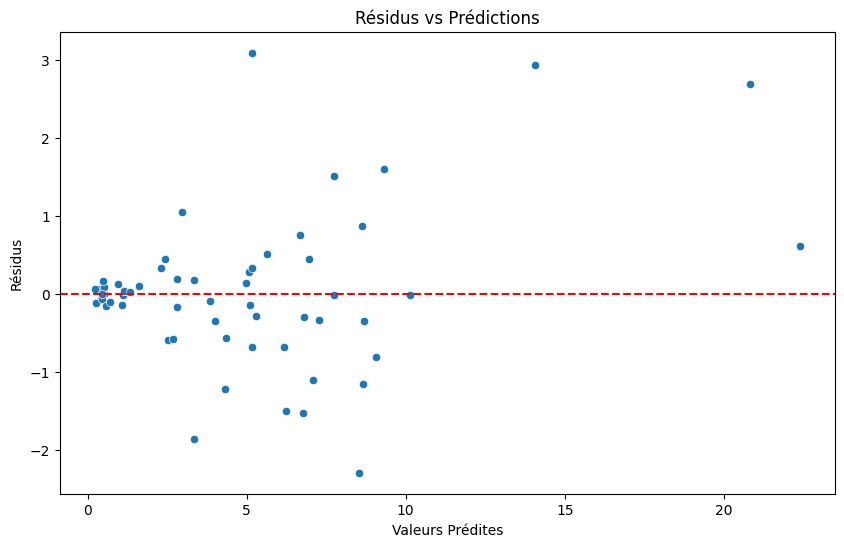

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prédictions
y_pred_rf = xgb_reg.predict(X_test)

# Calcul des résidus
residuals = y_test - y_pred_rf
# Visualisation des résidus
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus vs Prédictions')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()


In [18]:
import joblib

# Enregistrement du modèle Random Forest
joblib.dump(rf_reg, 'model.pkl')


['model.pkl']